<h1>Pandas</h1>

In [1]:
#installing pandas libraries
!pip install pandas-datareader  
# for reading files
!pip install --upgrade html5lib==1.0b8  
# for reading html

#There is a bug in the latest version of html5lib so install an earlier version
#Restart kernel after installing html5lib

  Using cached html5lib-1.0b8-py3-none-any.whl
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.1
    Uninstalling html5lib-1.1:
      Successfully uninstalled html5lib-1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.14 requires html5lib>=1.1, but you have html5lib 1.0b8 which is incompatible.


<h2>Imports</h2>

In [2]:
import pandas as pd #pandas library
from pandas_datareader import data #data readers (google, html, etc.)
#The following line ensures that graphs are rendered in the notebook (and not in another window)
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt #Plotting library
import datetime as dt #datetime for timeseries support

<h2>The structure of a dataframe</h2>

In [3]:
d = pd.DataFrame([[1,2,3],[4,5,6]],columns=['A','B','C']) 

In [4]:
d

,A,B,C
0,1,2,3
1,4,5,6


<h3>Accessing columns and rows</h3>

In [5]:
df = pd.DataFrame([['r1','00','01','02'],['r2','10','11','12'],['r3','20','21','22']],columns=['row_label','A','B','C'])
print(id(df))
df


2235372799408


,row_label,A,B,C
0,r1,00,01,02
1,r2,10,11,12
2,r3,20,21,22


In [12]:
df.set_index('row_label',inplace=True) # inplace = True means that the dataframe is changed. if it was false - a new df is created
print(id(df))
df

2235372799408


,A,B,C
row_label,,,
r1,00,01,02
r2,10,11,12
r3,20,21,22


In [7]:
df.reset_index(inplace=True)
df

,row_label,A,B,C
0,r1,00,01,02
1,r2,10,11,12
2,r3,20,21,22


<h3>Getting column data</h3>

In [8]:
df['B']

0    01
1    11
2    21
Name: B, dtype: object

In [11]:
print(type(df['B']))
print(type(df))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


<h3>Getting row data</h3>

In [13]:
df.loc['r1']  # a row of a DF is like an element of a dictionary

A    00
B    01
C    02
Name: r1, dtype: object

In [159]:
type(df.loc['r1'])

pandas.core.series.Series

<h3>Getting a row by row number</h3>

In [14]:
df.iloc[0] #this is faster than by row index

A    00
B    01
C    02
Name: r1, dtype: object

<h3>Getting multiple columns<h3>

In [15]:
df[['B','A']] #Note that the column identifiers are in a list

,B,A
row_label,,
r1,01,00
r2,11,10
r3,21,20


<h3>Getting a specific cell</h3>

In [16]:
df.loc['r2','B']

'11'

In [17]:
df.loc['r2']['B'] # chaining... the same result but not the same thing as in the cell above

'11'

In [18]:
id(df.loc['r2','B'])

2235075414576

In [19]:
id(df.loc['r2']['B'])

2235075414576

<h3>Slicing</h3>

In [20]:
df.loc['r1':'r2']

,A,B,C
row_label,,,
r1,00,01,02
r2,10,11,12


In [175]:
df.loc['r1':'r2','B':'C']

,B,C
row_label,,
r1,01,02
r2,11,12


In [21]:
df.head(2)

,A,B,C
row_label,,,
r1,00,01,02
r2,10,11,12


<h2>Pandas datareader</h2>
<li>Access data from html tables on any web page</li>
<li>Get data from google finance</li>
<li>Get data from the federal reserve</li>

<h3>HTML Tables</h3>
<li>Pandas datareader can read a table in an html page into a dataframe
<li>the read_html function returns a list of all dataframes with one dataframe for each html table on the page

<table>
    <tr><td>1</td><td>2</td></tr>
    <tr><td>3</td><td>4</td></tr>
</table>

<h4>Example: Read the tables from an html page</h4>

Unfortunately, the orginal bloomberg link doesn't work, here we use another website.

In [5]:
df_list = pd.read_html('https://www.x-rates.com/table/?from=USD&amount=1')  # looks for table tags and returns a list of tables apearing in a url
df_list # a list of dataframes - one for each table in the page
# print(len(df_list))

[               US Dollar    1.00 USD  inv. 1.00 USD
 0                   Euro    0.909729       1.099228
 1          British Pound    0.805589       1.241328
 2           Indian Rupee   81.845749       0.012218
 3      Australian Dollar    1.492001       0.670241
 4        Canadian Dollar    1.336915       0.747991
 5       Singapore Dollar    1.331345       0.751120
 6            Swiss Franc    0.894421       1.118041
 7      Malaysian Ringgit    4.401680       0.227186
 8           Japanese Yen  133.775737       0.007475
 9  Chinese Yuan Renminbi    6.870658       0.145546,
                 US Dollar      1.00 USD  inv. 1.00 USD
 0          Argentine Peso  2.150983e+02       0.004649
 1       Australian Dollar  1.492001e+00       0.670241
 2          Bahraini Dinar  3.760000e-01       2.659574
 3           Botswana Pula  1.310455e+01       0.076309
 4          Brazilian Real  4.928312e+00       0.202909
 5         Bruneian Dollar  1.331345e+00       0.751120
 6           Bulgarian L

<h4>The page contains two tables</h4>

In [117]:
df = df_list[0]
df

,US Dollar,1.00 USD,inv. 1.00 USD
0,Euro,0.927955,1.077638
1,British Pound,0.817772,1.222834
2,Indian Rupee,82.338807,0.012145
3,Australian Dollar,1.502937,0.665364
4,Canadian Dollar,1.378442,0.725457
5,Singapore Dollar,1.332577,0.750426
6,Swiss Franc,0.920232,1.086682
7,Malaysian Ringgit,4.427279,0.225872
8,Japanese Yen,130.731437,0.007649
9,Chinese Yuan Renminbi,6.867013,0.145624


<h4>Note that the read_html function has automatically detected the header columns</h4>
<h4>If an index is necessary, we need to explicitly specify it</h4>

In [118]:
df.set_index('US Dollar',inplace=True)
df

,1.00 USD,inv. 1.00 USD
US Dollar,,
Euro,0.927955,1.077638
British Pound,0.817772,1.222834
Indian Rupee,82.338807,0.012145
Australian Dollar,1.502937,0.665364
Canadian Dollar,1.378442,0.725457
Singapore Dollar,1.332577,0.750426
Swiss Franc,0.920232,1.086682
Malaysian Ringgit,4.427279,0.225872
Japanese Yen,130.731437,0.007649


<h4>Now we can use .loc to extract specific currency rates</h4>

In [119]:
df.loc['Euro','1.00 USD']

0.927955

In [112]:
df.loc['Euro':'Swiss Franc','1.00 USD']

US Dollar
Euro                  0.927955
British Pound         0.817772
Indian Rupee         82.338807
Australian Dollar     1.502937
Canadian Dollar       1.378442
Singapore Dollar      1.332577
Swiss Franc           0.920232
Name: 1.00 USD, dtype: float64

<h3>Working with views and copies</h3>

<h4>Chained indexing creates a copy and changes to the copy won't be reflected in the original dataframe
it is slower and less accurate</h4>

In [122]:
#eur_usd = df.loc['Euro']['1.00 USD'] #This is chained indexing - we are creating a copy of the dataframe
df.loc['Euro']['1.00 USD'] = 0.92 #Here we are changing a value in the dataframe
#this doesnt change the value of the dataframe
df

,1.00 USD,inv. 1.00 USD
US Dollar,,
Euro,0.920000,1.077638
British Pound,0.817772,1.222834
Indian Rupee,82.338807,0.012145
Australian Dollar,1.502937,0.665364
Canadian Dollar,1.378442,0.725457
Singapore Dollar,1.332577,0.750426
Swiss Franc,0.920232,1.086682
Malaysian Ringgit,4.427279,0.225872
Japanese Yen,130.731437,0.007649


In [121]:
df['1.00 USD']

US Dollar
Euro                       1.000000
British Pound              0.817772
Indian Rupee              82.338807
Australian Dollar          1.502937
Canadian Dollar            1.378442
Singapore Dollar           1.332577
Swiss Franc                0.920232
Malaysian Ringgit          4.427279
Japanese Yen             130.731437
Chinese Yuan Renminbi      6.867013
Name: 1.00 USD, dtype: float64

In [123]:
df

,1.00 USD,inv. 1.00 USD
US Dollar,,
Euro,0.920000,1.077638
British Pound,0.817772,1.222834
Indian Rupee,82.338807,0.012145
Australian Dollar,1.502937,0.665364
Canadian Dollar,1.378442,0.725457
Singapore Dollar,1.332577,0.750426
Swiss Franc,0.920232,1.086682
Malaysian Ringgit,4.427279,0.225872
Japanese Yen,130.731437,0.007649


In [124]:
df.loc['Euro','1.00 USD'] = 1.0 #this does change the value of the dataframe
df

,1.00 USD,inv. 1.00 USD
US Dollar,,
Euro,1.000000,1.077638
British Pound,0.817772,1.222834
Indian Rupee,82.338807,0.012145
Australian Dollar,1.502937,0.665364
Canadian Dollar,1.378442,0.725457
Singapore Dollar,1.332577,0.750426
Swiss Franc,0.920232,1.086682
Malaysian Ringgit,4.427279,0.225872
Japanese Yen,130.731437,0.007649


In [61]:
df = pd.DataFrame([['r1','00','01','02'],['r2','10','11','12'],['r3','20','21','22']],columns=['row_label','A','B','C'])
print(id(df))
df

2235378393296


,row_label,A,B,C
0,r1,00,01,02
1,r2,10,11,12
2,r3,20,21,22


In [62]:
df1 = df
print(id(df1)) # the same ID

2235378393296


<h2>Getting historical stock prices from Yahoo financs</h2>
Usage: DataReader(ticker,source,startdate,enddate)<br>
pandas_datareader is a Python package that provides a convenient way to access data from various online sources and load it into a Pandas DataFrame. It is built on top of Pandas and provides a consistent API for accessing data from different sources, such as Yahoo Finance, Google Finance, FRED, and others.

Unfortunately, the Google finance datareader has stopped working because of the charge of Google's policy


In [6]:
from pandas_datareader import data
import datetime as dt
# !pip install yfinance
# !pip install pathlib
import yfinance as yfin

start_time=dt.datetime(2022, 1, 1)
end_time=dt.datetime.today()

yfin.pdr_override()

# df = data.get_data_yahoo('IBM', '2022-10-24', '2023-1-1')  
df = data.get_data_yahoo('IBM', start_time, end_time)

# df = data.DataReader('AAPL', 'yahoo', start_time, end_time) # input: ticker (company's symbol), source: could be google, world bank..., 
                                                              #start date and end date



[*********************100%***********************]  1 of 1 completed


In [144]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,134.070007,136.289993,133.630005,136.039993,128.039185,4605900
2022-01-04,136.100006,139.949997,135.899994,138.020004,129.902786,7300000
2022-01-05,138.309998,142.199997,137.880005,138.220001,130.091003,8956900
2022-01-06,138.199997,138.410004,132.509995,135.339996,127.380371,9908100
2022-01-07,134.899994,135.660004,133.509995,134.830002,126.900375,5238100
...,...,...,...,...,...,...
2023-03-20,124.309998,126.160004,124.190002,125.940002,125.940002,4588300
2023-03-21,126.900002,127.150002,125.660004,126.570000,126.570000,3856300
2023-03-22,127.000000,127.220001,124.010002,124.050003,124.050003,3549000


In [7]:
df.shape

(322, 6)

In [8]:
id(df)

2637701228768

In [9]:
id(df.reset_index())

2637698702688

In [10]:
df = df.reset_index()

In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,134.070007,136.289993,133.630005,136.039993,128.039200,4605900
1,2022-01-04,136.100006,139.949997,135.899994,138.020004,129.902771,7300000
2,2022-01-05,138.309998,142.199997,137.880005,138.220001,130.091003,8956900
3,2022-01-06,138.199997,138.410004,132.509995,135.339996,127.380371,9908100
4,2022-01-07,134.899994,135.660004,133.509995,134.830002,126.900368,5238100
...,...,...,...,...,...,...,...
317,2023-04-10,129.830002,131.080002,129.240005,131.029999,131.029999,2614400
318,2023-04-11,130.580002,131.100006,130.179993,130.419998,130.419998,3132400
319,2023-04-12,130.399994,130.889999,128.169998,128.539993,128.539993,3957500
320,2023-04-13,128.009995,128.389999,126.000000,127.900002,127.900002,5620800


In [12]:
# myDate = dt.datetime(2020, 1, 1)
# df[df['Date']>myDate]

#df[df['High']>136]
df[df.High>136]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,134.070007,136.289993,133.630005,136.039993,128.039200,4605900
1,2022-01-04,136.100006,139.949997,135.899994,138.020004,129.902771,7300000
2,2022-01-05,138.309998,142.199997,137.880005,138.220001,130.091003,8956900
3,2022-01-06,138.199997,138.410004,132.509995,135.339996,127.380371,9908100
5,2022-01-10,134.470001,136.199997,133.380005,135.029999,127.088623,5432800
...,...,...,...,...,...,...,...
275,2023-02-07,135.669998,136.399994,134.449997,135.839996,134.191696,3737600
276,2023-02-08,135.710007,136.740005,135.160004,135.979996,134.330002,4593700
279,2023-02-13,136.000000,137.389999,135.850006,137.350006,137.350006,4403000
280,2023-02-14,137.050003,137.240005,135.050003,136.009995,136.009995,3202200


In [13]:
df['High']>134

0       True
1       True
2       True
3       True
4       True
       ...  
317    False
318    False
319    False
320    False
321    False
Name: High, Length: 322, dtype: bool

In [14]:
np.where(df['High']>136)

(array([  0,   1,   2,   3,   5,   8,  15,  16,  21,  22,  23,  24,  25,
         26,  27,  74,  75,  76,  77,  78,  79,  80,  84,  85,  86,  87,
         92,  93,  94, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
        123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 155,
        156, 157, 158, 159, 160, 206, 207, 208, 209, 210, 211, 212, 213,
        214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,
        227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
        240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252,
        253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265,
        266, 267, 269, 272, 273, 274, 275, 276, 279, 280, 281], dtype=int64),)

In [15]:
(df.iloc[np.where(df['High']>136)])

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,134.070007,136.289993,133.630005,136.039993,128.039200,4605900
1,2022-01-04,136.100006,139.949997,135.899994,138.020004,129.902771,7300000
2,2022-01-05,138.309998,142.199997,137.880005,138.220001,130.091003,8956900
3,2022-01-06,138.199997,138.410004,132.509995,135.339996,127.380371,9908100
5,2022-01-10,134.470001,136.199997,133.380005,135.029999,127.088623,5432800
...,...,...,...,...,...,...,...
275,2023-02-07,135.669998,136.399994,134.449997,135.839996,134.191696,3737600
276,2023-02-08,135.710007,136.740005,135.160004,135.979996,134.330002,4593700
279,2023-02-13,136.000000,137.389999,135.850006,137.350006,137.350006,4403000
280,2023-02-14,137.050003,137.240005,135.050003,136.009995,136.009995,3202200


In [31]:
id(df)

2380902505776

In [32]:
df.shape

(308, 8)

<h2>Datareader documentation</h2>
http://pandas-datareader.readthedocs.io/en/latest/</h2>

<h3>Working with a timeseries data frame</h3>
<li>The data is organized by time with the index serving as the timeline


<h4>Creating new columns</h4>
<li>Add a column to a dataframe
<li>Base the elements of the column on some combination of data in the existing columns
<h4>Example: Number of Days that the stock closed higher than it opened
<li>We'll create a new column with the header "UP"
<li>And use np.where to decide what to put in the column

In [149]:
df['Close']>df['Open']

0       True
1       True
2      False
3      False
4      False
       ...  
303     True
304    False
305    False
306    False
307     True
Length: 308, dtype: bool

In [152]:
np.where(df['Close']>df['Open'],1,0)

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,

In [16]:
def calcIsDown(row):
    if row['Close']<row['Open']:
        return 1
    else:
        return 0
#1
df['DOWN']= df.apply(lambda row: 1 if row['Close']<row['Open'] else 0 ,axis=1)
#2 
df['DOWN2']= df.apply(calcIsDown, axis=1)

df['Close_Higher_than_140'] = np.where(df['Close']>140,1,0)
df['Close_Higher_than_140_2'] = df['Close'].apply(lambda x: 1 if x>140 else 0)
df.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume,DOWN,DOWN2,Close_Higher_than_140,Close_Higher_than_140_2
0,2022-01-03,134.070007,136.289993,133.630005,136.039993,128.039200,4605900,0,0,0,0
1,2022-01-04,136.100006,139.949997,135.899994,138.020004,129.902771,7300000,0,0,0,0
2,2022-01-05,138.309998,142.199997,137.880005,138.220001,130.091003,8956900,1,1,0,0
3,2022-01-06,138.199997,138.410004,132.509995,135.339996,127.380371,9908100,1,1,0,0


In [157]:
df['Close'].apply(lambda x: 1 if x>140 else 0)

0      0
1      0
2      0
3      0
4      0
      ..
303    0
304    0
305    0
306    0
307    0
Name: Close, Length: 308, dtype: int64

In [17]:
df.drop(columns=['DOWN2'],inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,DOWN,Close_Higher_than_140,Close_Higher_than_140_2
0,2022-01-03,134.070007,136.289993,133.630005,136.039993,128.039200,4605900,0,0,0
1,2022-01-04,136.100006,139.949997,135.899994,138.020004,129.902771,7300000,0,0,0
2,2022-01-05,138.309998,142.199997,137.880005,138.220001,130.091003,8956900,1,0,0
3,2022-01-06,138.199997,138.410004,132.509995,135.339996,127.380371,9908100,1,0,0
4,2022-01-07,134.899994,135.660004,133.509995,134.830002,126.900368,5238100,1,0,0
...,...,...,...,...,...,...,...,...,...,...
317,2023-04-10,129.830002,131.080002,129.240005,131.029999,131.029999,2614400,0,0,0
318,2023-04-11,130.580002,131.100006,130.179993,130.419998,130.419998,3132400,1,0,0
319,2023-04-12,130.399994,130.889999,128.169998,128.539993,128.539993,3957500,1,0,0
320,2023-04-13,128.009995,128.389999,126.000000,127.900002,127.900002,5620800,1,0,0


In [37]:
#df=df.drop('ones',axis=1)
#3
df['DOWN'] = np.where(df['Close']>df['Open'],0,1)
df

,index,Date,Open,High,Low,Close,Adj Close,Volume,DOWN,Close_Higher_than_140
0,0,2022-01-03,134.070007,136.289993,133.630005,136.039993,128.039200,4605900,0,0
1,1,2022-01-04,136.100006,139.949997,135.899994,138.020004,129.902771,7300000,0,0
2,2,2022-01-05,138.309998,142.199997,137.880005,138.220001,130.091003,8956900,1,0
3,3,2022-01-06,138.199997,138.410004,132.509995,135.339996,127.380386,9908100,1,0
4,4,2022-01-07,134.899994,135.660004,133.509995,134.830002,126.900383,5238100,1,0
...,...,...,...,...,...,...,...,...,...,...
303,303,2023-03-20,124.309998,126.160004,124.190002,125.940002,125.940002,4588300,0,0
304,304,2023-03-21,126.900002,127.150002,125.660004,126.570000,126.570000,3856300,1,0
305,305,2023-03-22,127.000000,127.220001,124.010002,124.050003,124.050003,3549000,1,0
306,306,2023-03-23,123.809998,124.930000,122.599998,123.370003,123.370003,4651900,1,0


In [44]:
df['UP']=np.where(df['Close']>df['Open'],1,0)

df['UP2']=df['Close']>df['Open']

df


,index,Date,Open,High,Low,Close,Adj Close,Volume,DOWN,UP
0,0,2022-01-03,134.070007,136.289993,133.630005,136.039993,128.039200,4605900,0,1
1,1,2022-01-04,136.100006,139.949997,135.899994,138.020004,129.902771,7300000,0,1
2,2,2022-01-05,138.309998,142.199997,137.880005,138.220001,130.091003,8956900,1,0
3,3,2022-01-06,138.199997,138.410004,132.509995,135.339996,127.380386,9908100,1,0
4,4,2022-01-07,134.899994,135.660004,133.509995,134.830002,126.900383,5238100,1,0
...,...,...,...,...,...,...,...,...,...,...
303,303,2023-03-20,124.309998,126.160004,124.190002,125.940002,125.940002,4588300,0,1
304,304,2023-03-21,126.900002,127.150002,125.660004,126.570000,126.570000,3856300,1,0
305,305,2023-03-22,127.000000,127.220001,124.010002,124.050003,124.050003,3549000,1,0
306,306,2023-03-23,123.809998,124.930000,122.599998,123.370003,123.370003,4651900,1,0


In [43]:
df.drop(columns=['UP2','Close_Higher_than_140'],inplace=True)


<h3>Get summary statistics</h3>
<li>The "describe" function returns a dataframe containing summary stats for all numerical columns
<li>Columns containing non-numerical data are ignored

In [45]:
df

,index,Date,Open,High,Low,Close,Adj Close,Volume,DOWN,UP
0,0,2022-01-03,134.070007,136.289993,133.630005,136.039993,128.039200,4605900,0,1
1,1,2022-01-04,136.100006,139.949997,135.899994,138.020004,129.902771,7300000,0,1
2,2,2022-01-05,138.309998,142.199997,137.880005,138.220001,130.091003,8956900,1,0
3,3,2022-01-06,138.199997,138.410004,132.509995,135.339996,127.380386,9908100,1,0
4,4,2022-01-07,134.899994,135.660004,133.509995,134.830002,126.900383,5238100,1,0
...,...,...,...,...,...,...,...,...,...,...
303,303,2023-03-20,124.309998,126.160004,124.190002,125.940002,125.940002,4588300,0,1
304,304,2023-03-21,126.900002,127.150002,125.660004,126.570000,126.570000,3856300,1,0
305,305,2023-03-22,127.000000,127.220001,124.010002,124.050003,124.050003,3549000,1,0
306,306,2023-03-23,123.809998,124.930000,122.599998,123.370003,123.370003,4651900,1,0


In [46]:
stats = df.describe()
stats

,index,Open,High,Low,Close,Adj Close,Volume,DOWN,UP
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02,308.000000,308.000000
mean,153.500000,133.677532,134.949221,132.383864,133.729968,129.847027,5.051809e+06,0.470779,0.529221
std,89.056162,7.115453,7.149197,7.165085,7.193305,7.806424,3.278406e+06,0.499958,0.499958
min,0.000000,116.099998,118.809998,115.550003,117.570000,114.774948,2.075200e+06,0.000000,0.000000
25%,76.750000,128.397495,129.315006,127.264997,128.412498,124.076588,3.523125e+06,0.000000,0.000000
50%,153.500000,133.769997,135.165001,132.270004,133.889999,129.126282,4.303200e+06,0.000000,1.000000
75%,230.250000,138.234997,139.889996,136.987503,138.387497,135.006763,5.402350e+06,1.000000,1.000000
max,307.000000,150.470001,153.210007,149.949997,150.570007,148.742966,3.739980e+07,1.000000,1.000000


<h4>Calculate the percentage of days that the stock has closed higher than its open</h4>

In [47]:
df['UP'].count()

308

In [48]:
df['UP'].sum()/df['UP'].count()

0.5292207792207793

In [49]:
df['UP'].mean()

0.5292207792207793

In [50]:
df.columns

Index(['index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'DOWN', 'UP'],
      dtype='object')

<h4>Calculate percent changes</h4>
<li>The function pct_change computes a percent change between successive rows (times in  timeseries data)
<li>Defaults to a single time delta
<li>With an argument, the time delta can be changed

In [51]:
df['Close']

0      136.039993
1      138.020004
2      138.220001
3      135.339996
4      134.830002
          ...    
303    125.940002
304    126.570000
305    124.050003
306    123.370003
307    125.290001
Name: Close, Length: 308, dtype: float64

In [52]:
df.Close.shift(periods=1)

0             NaN
1      136.039993
2      138.020004
3      138.220001
4      135.339996
          ...    
303    123.690002
304    125.940002
305    126.570000
306    124.050003
307    123.370003
Name: Close, Length: 308, dtype: float64

In [53]:
df['Close'].pct_change() #One timeperiod percent change

0           NaN
1      0.014555
2      0.001449
3     -0.020836
4     -0.003768
         ...   
303    0.018191
304    0.005002
305   -0.019910
306   -0.005482
307    0.015563
Name: Close, Length: 308, dtype: float64

In [55]:
n=13
df['Close'].pct_change(n) #n timeperiods percent change

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
303   -0.017552
304   -0.018304
305   -0.043119
306   -0.052385
307   -0.023080
Name: Close, Length: 308, dtype: float64

In [58]:
# Another way to calculate changes is using shift of a column:
df['Low_prev'] = df.Low.shift(1)
df['Low_change'] = (df.Low - df.Low_prev)/df.Low_prev


In [59]:
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,DOWN,UP,Low_prev,Low_change
0,0,2022-01-03,134.070007,136.289993,133.630005,136.039993,128.039200,4605900,0,1,NaN,NaN
1,1,2022-01-04,136.100006,139.949997,135.899994,138.020004,129.902771,7300000,0,1,133.630005,0.016987
2,2,2022-01-05,138.309998,142.199997,137.880005,138.220001,130.091003,8956900,1,0,135.899994,0.014570
3,3,2022-01-06,138.199997,138.410004,132.509995,135.339996,127.380386,9908100,1,0,137.880005,-0.038947
4,4,2022-01-07,134.899994,135.660004,133.509995,134.830002,126.900383,5238100,1,0,132.509995,0.007547


<h3>NaN support</h3>
Pandas functions can ignore NaNs

In [60]:
n=13
df['Close'].pct_change(n).mean()

-0.0017791740787950641

<h3>Rolling windows</h3>
<li>"rolling" function extracts rolling windows
<li>For example, the 21 period rolling window of the 13 period percent change 

In [295]:
df.Close.rolling(21)

Rolling [window=21,center=False,axis=0,method=single]

<h4>Calculate something on the rolling windows</h4>

<h4>Example: mean (the 21 day moving average of the 13 day percent change)

In [61]:
df['Close'][0:25]

0     136.039993
1     138.020004
2     138.220001
3     135.339996
4     134.830002
5     135.029999
6     132.869995
7     133.589996
8     134.759995
9     134.210007
10    132.940002
11    131.580002
12    130.820007
13    129.350006
14    128.820007
15    136.100006
16    134.259995
17    132.520004
18    134.500000
19    133.570007
20    135.529999
21    137.250000
22    137.779999
23    137.149994
24    137.240005
Name: Close, dtype: float64

In [62]:
n=1
df['Close'].rolling(21).mean()[0:25]

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20    133.947620
21    134.005240
22    133.993811
23    133.942858
24    134.033335
Name: Close, dtype: float64

<h4>Calculate several moving averages and graph them</h4>

In [63]:
ma_8 = df['Close'].pct_change(n).rolling(window=8).mean()
ma_13= df['Close'].pct_change(n).rolling(window=13).mean()
ma_21= df['Close'].pct_change(n).rolling(window=21).mean()
ma_30= df['Close'].pct_change(n).rolling(window=30).mean()
ma_60= df['Close'].pct_change(n).rolling(window=60).mean()

In [64]:
ma_8[0:15]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8    -0.001117
9    -0.003447
10   -0.004811
11   -0.003485
12   -0.003736
13   -0.005326
14   -0.003838
Name: Close, dtype: float64

In [65]:
type(ma_30)

pandas.core.series.Series

In [66]:
ma_13[0:20]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13   -0.003825
14   -0.005260
15   -0.001024
16   -0.000461
17   -0.001168
18   -0.000133
19    0.000566
Name: Close, dtype: float64

<AxesSubplot:>

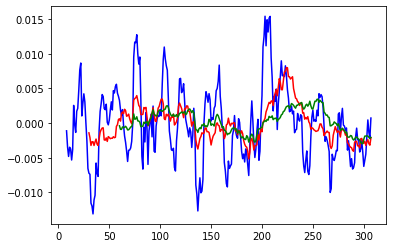

In [69]:
ma_8.plot(color='b')
ma_30.plot(color='r')
ma_60.plot(color='g')

<h2>Linear regression with pandas</h2>
<h4>Example: TAN is the ticker for a solar ETF  fund. FSLR, SPWR are tickers of companies that build or lease solar panels. Each has a different business model. We'll use pandas to study the risk reward tradeoff between the 3 investments and also see how correlated they are</h4>

In [91]:
start_time=dt.datetime(2022, 1, 1)
end_time=dt.datetime.today()

# yfin.pdr_override()

solar_df = data.get_data_yahoo(['FSLR', 'TAN','SPWR'], start_time, end_time)['Close']

# solar_df = data.DataReader(['FSLR', 'TAN','SPWR'],'yahoo', start=start,end=end)['Close']
solar_df

[*********************100%***********************]  3 of 3 completed


,FSLR,SPWR,TAN
Date,,,
2022-01-03,88.580002,21.549999,78.489998
2022-01-04,87.279999,21.530001,76.320000
2022-01-05,83.510002,19.780001,71.209999
2022-01-06,83.970001,19.150000,70.629997
2022-01-07,84.680000,19.379999,70.750000
...,...,...,...
2023-03-20,204.679993,12.690000,70.510002
2023-03-21,209.250000,13.690000,74.080002
2023-03-22,205.009995,12.770000,72.489998


In [92]:
#digitalProd_df
solar_df['FSLR_change'] = solar_df['FSLR'].pct_change()


In [93]:
solar_df

,FSLR,SPWR,TAN,FSLR_change
Date,,,,
2022-01-03,88.580002,21.549999,78.489998,NaN
2022-01-04,87.279999,21.530001,76.320000,-0.014676
2022-01-05,83.510002,19.780001,71.209999,-0.043194
2022-01-06,83.970001,19.150000,70.629997,0.005508
2022-01-07,84.680000,19.379999,70.750000,0.008455
...,...,...,...,...
2023-03-20,204.679993,12.690000,70.510002,0.025348
2023-03-21,209.250000,13.690000,74.080002,0.022328
2023-03-22,205.009995,12.770000,72.489998,-0.020263


<h4>Let's calculate returns (the 1 day percent change)</h4>

In [94]:
# rets = digitalProd_df.pct_change()

rets = solar_df.pct_change()
rets

,FSLR,SPWR,TAN,FSLR_change
Date,,,,
2022-01-03,NaN,NaN,NaN,NaN
2022-01-04,-0.014676,-0.000928,-0.027647,NaN
2022-01-05,-0.043194,-0.081282,-0.066955,1.943185
2022-01-06,0.005508,-0.031850,-0.008145,-1.127524
2022-01-07,0.008455,0.012010,0.001699,0.535024
...,...,...,...,...
2023-03-20,0.025348,0.025869,0.015848,-1.754454
2023-03-21,0.022328,0.078802,0.050631,-0.119164
2023-03-22,-0.020263,-0.067202,-0.021463,-1.907527


<h4>Let's visualize the relationship between each stock and the ETF</h4>

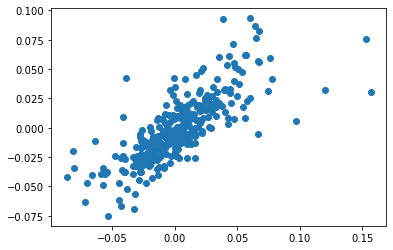

In [95]:
import matplotlib.pyplot as plt
#plt.scatter(rets['AAPL'],rets['SMSN.L'])

plt.scatter(rets.FSLR,rets.TAN)

In [ ]:
#plt.scatter(rets.RGSE,rets.TAN)

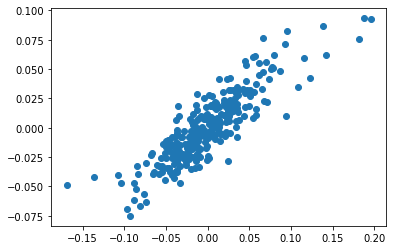

In [96]:
plt.scatter(rets.SPWR,rets.TAN)

<h4>The correlation matrix</h4>

In [97]:
solar_corr = rets.corr()
(solar_corr)

,FSLR,SPWR,TAN,FSLR_change
FSLR,1.000000,0.680707,0.767990,-0.056102
SPWR,0.680707,1.000000,0.869195,-0.068889
TAN,0.767990,0.869195,1.000000,-0.056738
FSLR_change,-0.056102,-0.068889,-0.056738,1.000000


<h3>Basic risk analysis</h3>
<h4>We'll plot the mean and std or returns for each ticker to get a sense of the risk return profile</h4>

In [122]:
print(rets.mean())
print(rets.std())

Symbols
FSLR           0.000657
TAN            0.000572
SPWR           0.000214
FSLR_change    0.478075
dtype: float64
Symbols
FSLR            0.023064
TAN             0.016852
SPWR            0.033452
FSLR_change    12.623191
dtype: float64


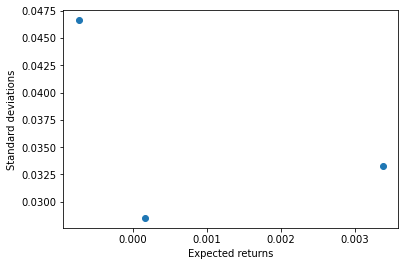

In [98]:
# plt.scatter(rets[['FSLR','TAN','SPWR']].mean(), rets[['FSLR','TAN','SPWR']].std())
plt.scatter(rets[['FSLR','TAN','SPWR']].mean(), rets[['FSLR','TAN','SPWR']].std())
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')
plt.show()

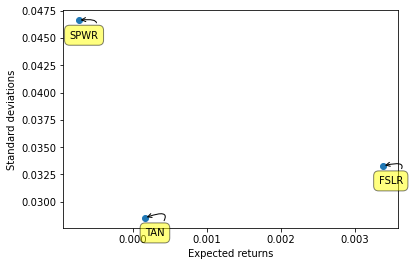

In [99]:
#plt.scatter(rets[['FSLR','TAN','SPWR']].mean(), rets[['FSLR','TAN','SPWR']].std())
plt.scatter(rets[['FSLR','TAN','SPWR']].mean(), rets[['FSLR','TAN','SPWR']].std())
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(  # adding annotation to the diagram
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5), # alpha - the intensity of the color
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=2')
    )
#plt.xlim(0.0,0.0015)

plt.show()


In [229]:
list(zip(rets.columns, rets.mean(), rets.std()))

[('FSLR', 0.0006569761725659778, 0.023064446564513646),
 ('TAN', 0.0005716152286967802, 0.016851964121580597),
 ('SPWR', 0.0002139386655404213, 0.033451894136634866),
 ('FSLR_change', 0.478074766369697, 12.62319144682584)]

<h2>Regressions</h2>
http://statsmodels.sourceforge.net/

<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [100]:
import numpy as np
import statsmodels.api as sm

C:\Users\anatl\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [103]:

X=solar_df[['FSLR','SPWR']]
X = sm.add_constant(X) #adds a column of ones
y=solar_df['TAN']
model = sm.OLS(y,X,missing='drop') # https://en.wikipedia.org/wiki/Ordinary_least_squares 
                                    # drop - removes rows with missing values
result = model.fit() # finds the model parameters
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    TAN   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     380.0
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           1.55e-83
Time:                        23:47:08   Log-Likelihood:                -841.03
No. Observations:                 308   AIC:                             1688.
Df Residuals:                     305   BIC:                             1699.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.4494      1.265     31.968      0.0

In [104]:
X

,const,FSLR,SPWR
Date,,,
2022-01-03,1.0,88.580002,21.549999
2022-01-04,1.0,87.279999,21.530001
2022-01-05,1.0,83.510002,19.780001
2022-01-06,1.0,83.970001,19.150000
2022-01-07,1.0,84.680000,19.379999
...,...,...,...
2023-03-20,1.0,204.679993,12.690000
2023-03-21,1.0,209.250000,13.690000
2023-03-22,1.0,205.009995,12.770000


In [105]:
y

Date
2022-01-03    78.489998
2022-01-04    76.320000
2022-01-05    71.209999
2022-01-06    70.629997
2022-01-07    70.750000
                ...    
2023-03-20    70.510002
2023-03-21    74.080002
2023-03-22    72.489998
2023-03-23    73.580002
2023-03-24    72.980003
Name: TAN, Length: 308, dtype: float64

<h4>Finally plot the fitted line with the actual y values

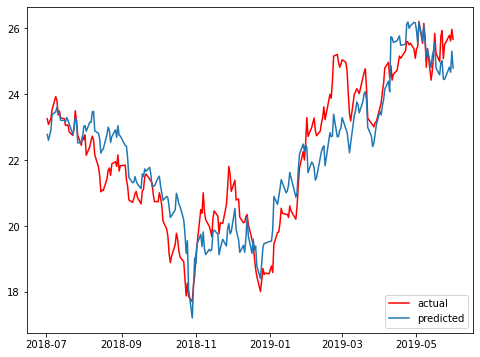

In [129]:
fig, ax = plt.subplots(figsize=(8,6)) # Create just a figure and only one subplot
ax.plot(y, color='r', label='actual')
ax.plot(result.fittedvalues, label='predicted')
ax.legend(loc="lower right") #"upper right"


In [106]:
result

In [107]:
result.fittedvalues

Date
2022-01-03    75.441123
2022-01-04    75.318849
2022-01-05    72.729726
2022-01-06    71.931642
2022-01-07    72.287745
                ...    
2023-03-20    72.301541
2023-03-21    73.959176
2023-03-22    72.431527
2023-03-23    72.588996
2023-03-24    72.405178
Length: 308, dtype: float64